In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [106]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
bitcoin = yf.Ticker("BTC-USD")
ethereum = yf.Ticker("ETH-USD")
sp_500 = yf.Ticker("^GSPC")
nasdaq = yf.Ticker("^IXIC")
oro = yf.Ticker("GC=F")
euro_dollar = yf.Ticker("EURUSD=X")

In [5]:
# get all stock info
bitcoin.info

{'name': 'Bitcoin',
 'startDate': 1278979200,
 'description': 'Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,782,040. The last known price of Bitcoin is 90,684.91603525 USD and is up 3.52 over the last 24 hours. It is currently trading on 11799 active market(s) with $118,254,292,730.97 traded over the last 24 hours. More information can be found at https://bitcoin.org/.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 87305.71,
 'open': 87305.71,
 'dayLow': 87305.71,
 'dayHigh': 88344.74,
 'regularMarketPreviousClose': 87305.71,
 'regularMarketOpen': 87305.71,
 'regularMarketDayLow': 87305.71,
 'regularMarketDayHigh': 88344.74,
 'volume': 86794117120,
 'regularMarketVolume': 86794117120,
 'averageVolume': 35916548717,
 'averageVolume10days': 81124810864,
 'averageDailyVolume10Day': 81124810864,
 'marketCap': 1741487603712,
 'fiftyTwoWeekLow': 35670.973,
 'fiftyTwoWeekHigh': 9343

In [107]:
# Definir los símbolos de los activos
symbols = ["BTC-USD", "ETH-USD", "MSFT",  "^GSPC", "^IXIC", "GC=F", "EURUSD=X"]

# Crear la lista de objetos Ticker
tickers = [yf.Ticker(symbol) for symbol in symbols]

# Diccionario para almacenar el historial de cada ticker
hist_data = []

# Extraer el historial de cada ticker y agregar una columna que indique el activo
for symbol, ticker in zip(symbols, tickers):
    hist = ticker.history(period="max")
    hist['Symbol'] = symbol  # Añadir columna del símbolo
    hist_data.append(hist[['Symbol', 'Open', 'High', 'Low', 'Close', 'Volume']])

# Combinar los datos en un único DataFrame
df_hist = pd.concat(hist_data).reset_index()

# Mostrar las primeras filas del DataFrame combinado
df_hist.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2014-09-17 00:00:00+00:00,BTC-USD,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18 00:00:00+00:00,BTC-USD,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19 00:00:00+00:00,BTC-USD,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20 00:00:00+00:00,BTC-USD,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21 00:00:00+00:00,BTC-USD,408.084991,412.425995,393.181000,398.821014,26580100


In [119]:
# Agrupar por el símbolo del activo y calcular estadísticas descriptivas
stats_by_symbol = df_hist.groupby("Symbol").describe()

# Mostrar las estadísticas descriptivas por símbolo
stats_by_symbol[["Retorno_Porcentual"]]

Retorno_Porcentual                                           \
                      count      mean       std        min       25%   
Symbol                                                                 
BTC-USD              3711.0  0.208238  3.633506 -37.169539 -1.259868   
ETH-USD              2562.0  0.194736  4.590543 -42.347221 -1.864972   
EURUSD=X             5440.0  0.000175  0.708009 -13.352640 -0.319138   
GC=F                 6074.0  0.042792  1.086291  -9.353766 -0.473646   
MSFT                 9747.0  0.113288  2.105150 -30.115864 -0.911381   
^GSPC               24335.0  0.031056  1.193645 -20.466931 -0.454614   
^IXIC               13561.0  0.046741  1.263804 -12.321331 -0.457142   

                                         
               50%       75%        max  
Symbol                                   
BTC-USD   0.134848  1.699756  25.247169  
ETH-USD   0.079667  2.257380  26.458071  
EURUSD=X  0.000000  0.320146  17.307895  
GC=F      0.046431  0.617854   9.027685  
MSFT      0.037921  1.122329  19.565200  
^GSPC     0.048899  0.546600  16.609585  
^IXIC     0.106922  0.623898  14.173196

In [109]:
# Asegúrate de tener el DataFrame df_hist con las columnas necesarias
df_hist['Date'] = df_hist['Date'].astype(str).str[:10]

# Convertir la columna 'Date' a tipo datetime
df_hist['Date'] = pd.to_datetime(df_hist['Date'])

# Añadir una columna de año al DataFrame
df_hist['Year'] = df_hist['Date'].dt.year

# Agregar columnas de año y mes
df_hist['YearMonth'] = df_hist['Date'].dt.to_period('M')

# Establecer 'Date' como índice
df_hist.set_index('Date', inplace=True)


In [110]:
df_hist

,Symbol,Open,High,Low,Close,Volume,Year,YearMonth
Date,,,,,,,,
2014-09-17,BTC-USD,465.864014,468.174011,452.421997,457.334015,21056800,2014,2014-09
2014-09-18,BTC-USD,456.859985,456.859985,413.104004,424.440002,34483200,2014,2014-09
2014-09-19,BTC-USD,424.102997,427.834991,384.532013,394.795990,37919700,2014,2014-09
2014-09-20,BTC-USD,394.673004,423.295990,389.882996,408.903992,36863600,2014,2014-09
2014-09-21,BTC-USD,408.084991,412.425995,393.181000,398.821014,26580100,2014,2014-09
...,...,...,...,...,...,...,...,...
2024-11-11,EURUSD=X,1.071490,1.072846,1.062880,1.071490,0,2024,2024-11
2024-11-12,EURUSD=X,1.066439,1.066348,1.059704,1.066439,0,2024,2024-11
2024-11-13,EURUSD=X,1.061673,1.064906,1.055977,1.061673,0,2024,2024-11


In [111]:

# Calcular el retorno porcentual diario por símbolo
df_hist['Retorno_Porcentual'] = df_hist.groupby('Symbol')['Close'].pct_change() * 100
df_hist

,Symbol,Open,High,Low,Close,Volume,Year,YearMonth,Retorno_Porcentual
Date,,,,,,,,,
2014-09-17,BTC-USD,465.864014,468.174011,452.421997,457.334015,21056800,2014,2014-09,NaN
2014-09-18,BTC-USD,456.859985,456.859985,413.104004,424.440002,34483200,2014,2014-09,-7.192558
2014-09-19,BTC-USD,424.102997,427.834991,384.532013,394.795990,37919700,2014,2014-09,-6.984265
2014-09-20,BTC-USD,394.673004,423.295990,389.882996,408.903992,36863600,2014,2014-09,3.573492
2014-09-21,BTC-USD,408.084991,412.425995,393.181000,398.821014,26580100,2014,2014-09,-2.465854
...,...,...,...,...,...,...,...,...,...
2024-11-11,EURUSD=X,1.071490,1.072846,1.062880,1.071490,0,2024,2024-11,-0.743613
2024-11-12,EURUSD=X,1.066439,1.066348,1.059704,1.066439,0,2024,2024-11,-0.471368
2024-11-13,EURUSD=X,1.061673,1.064906,1.055977,1.061673,0,2024,2024-11,-0.446963


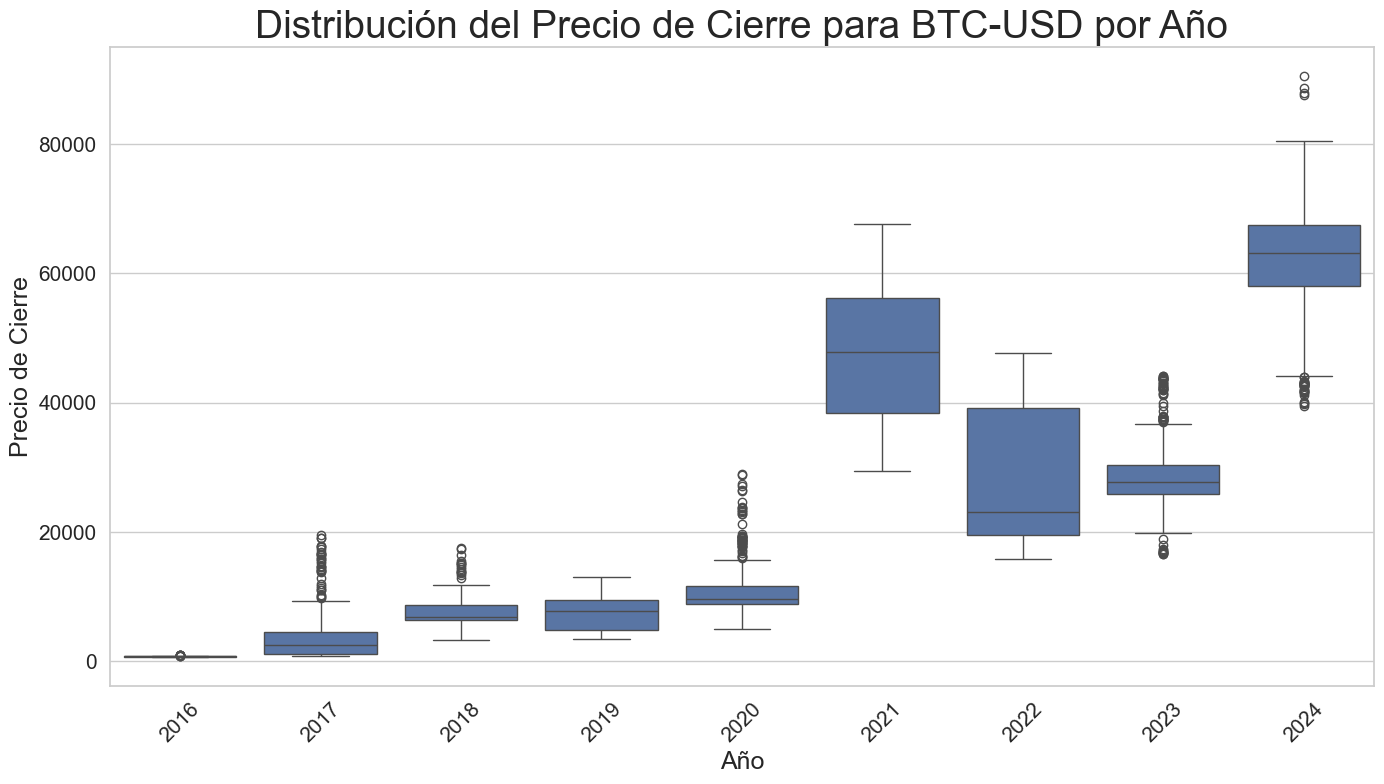

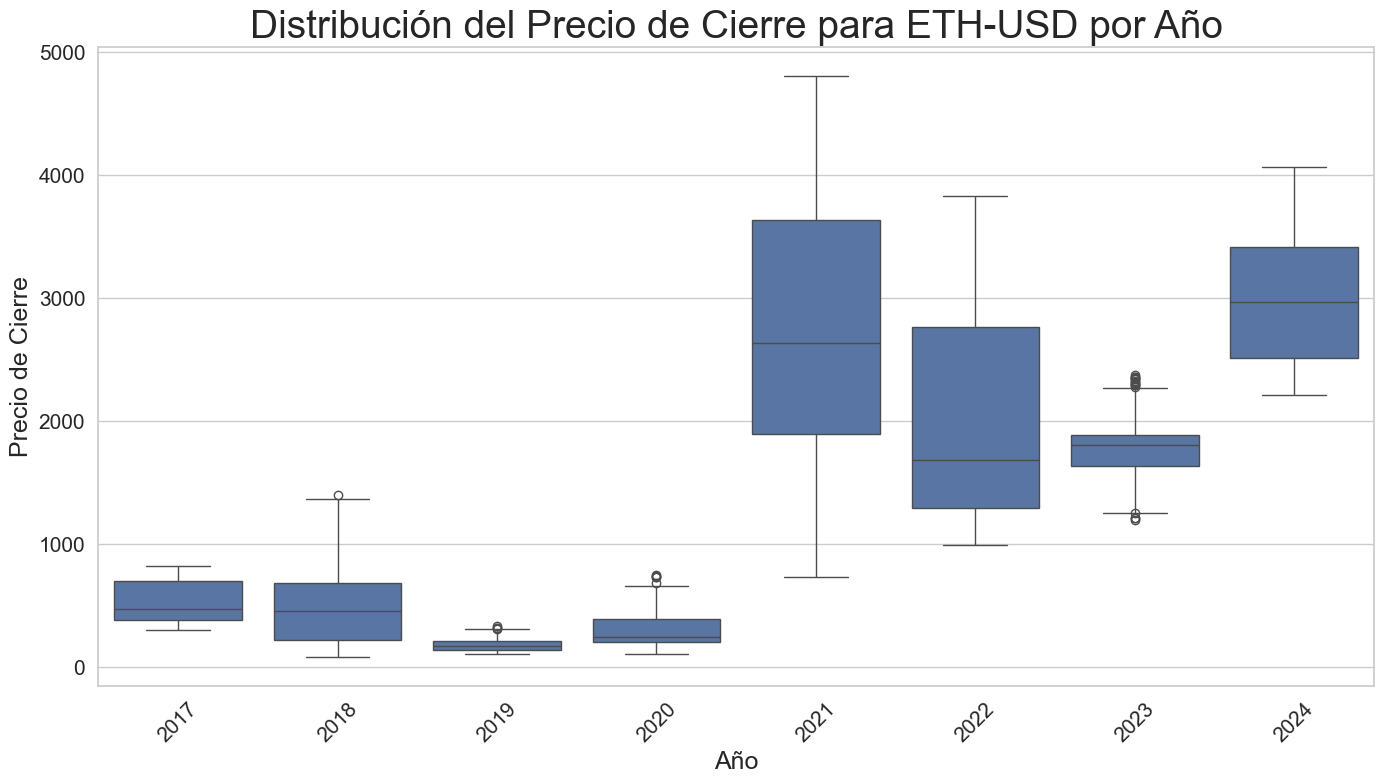

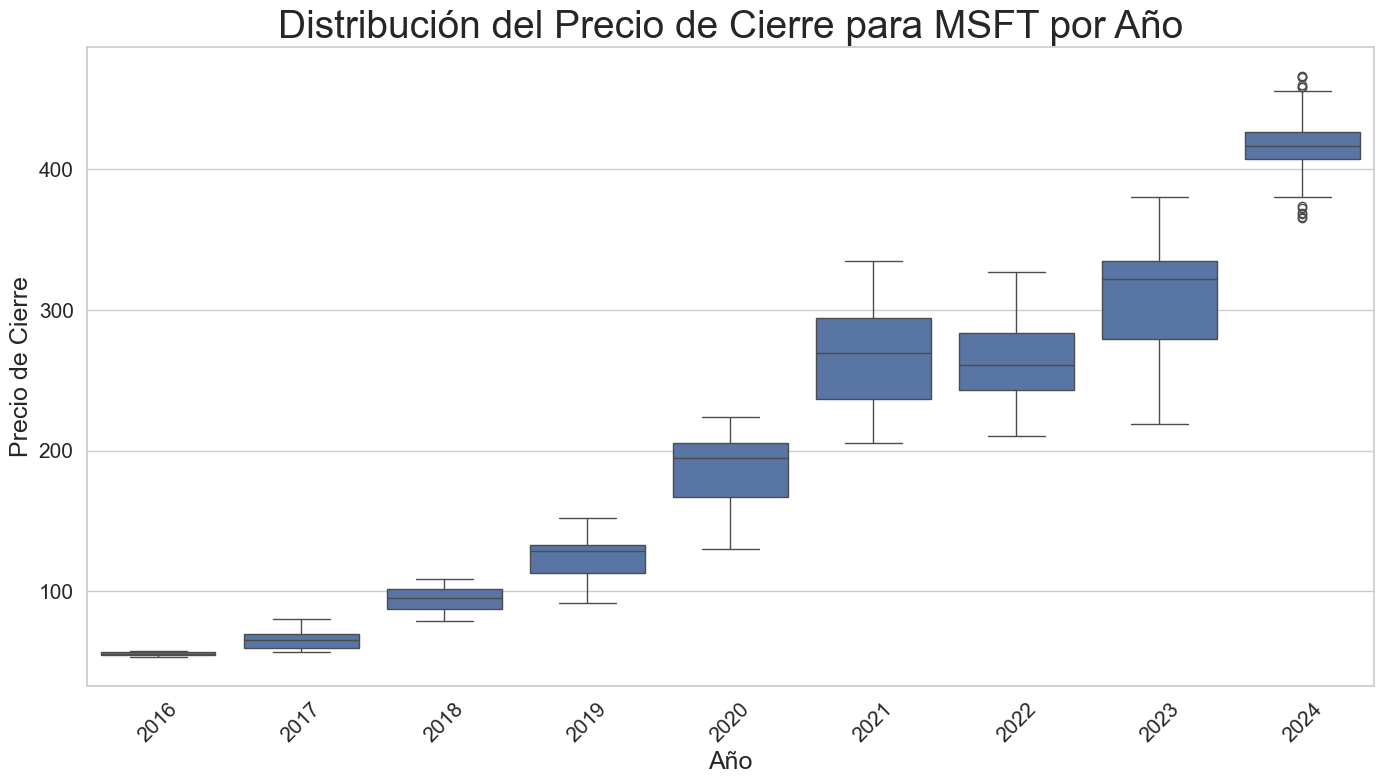

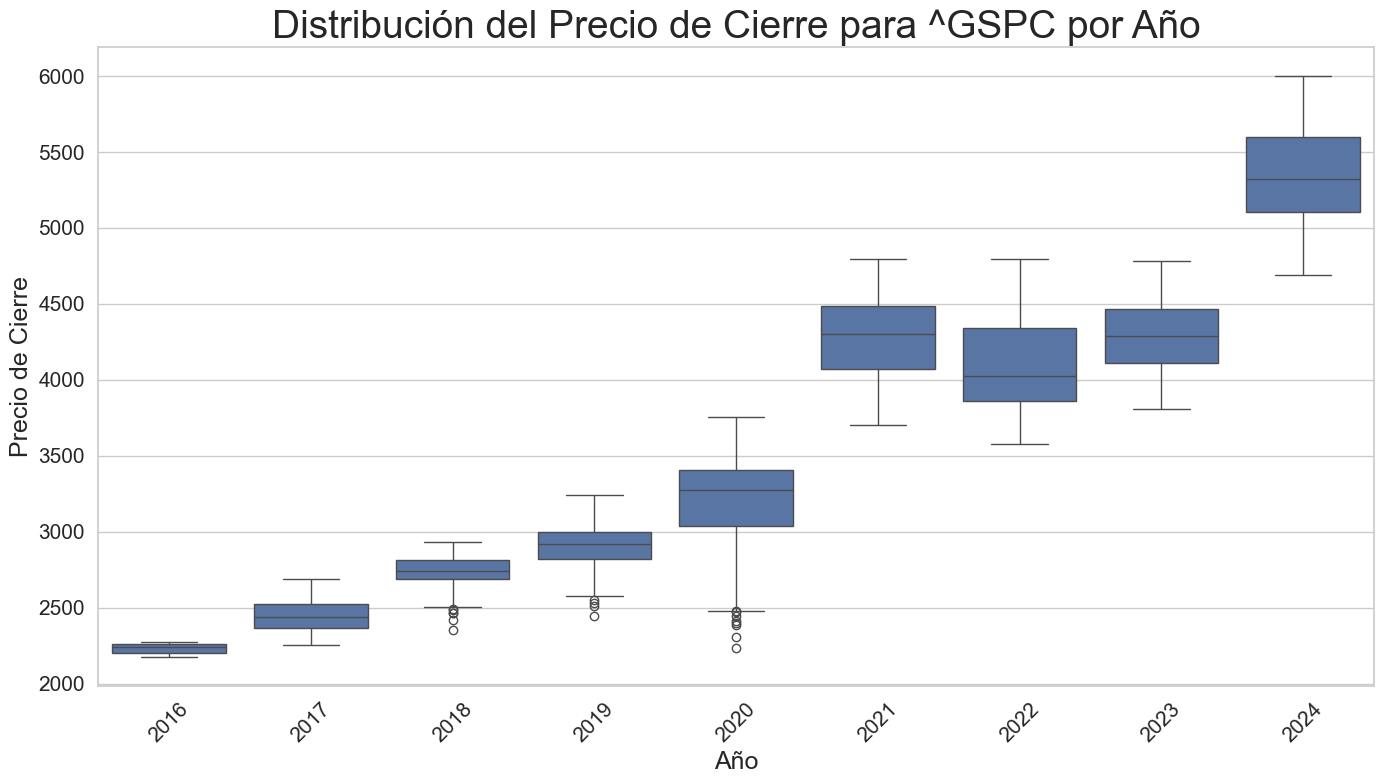

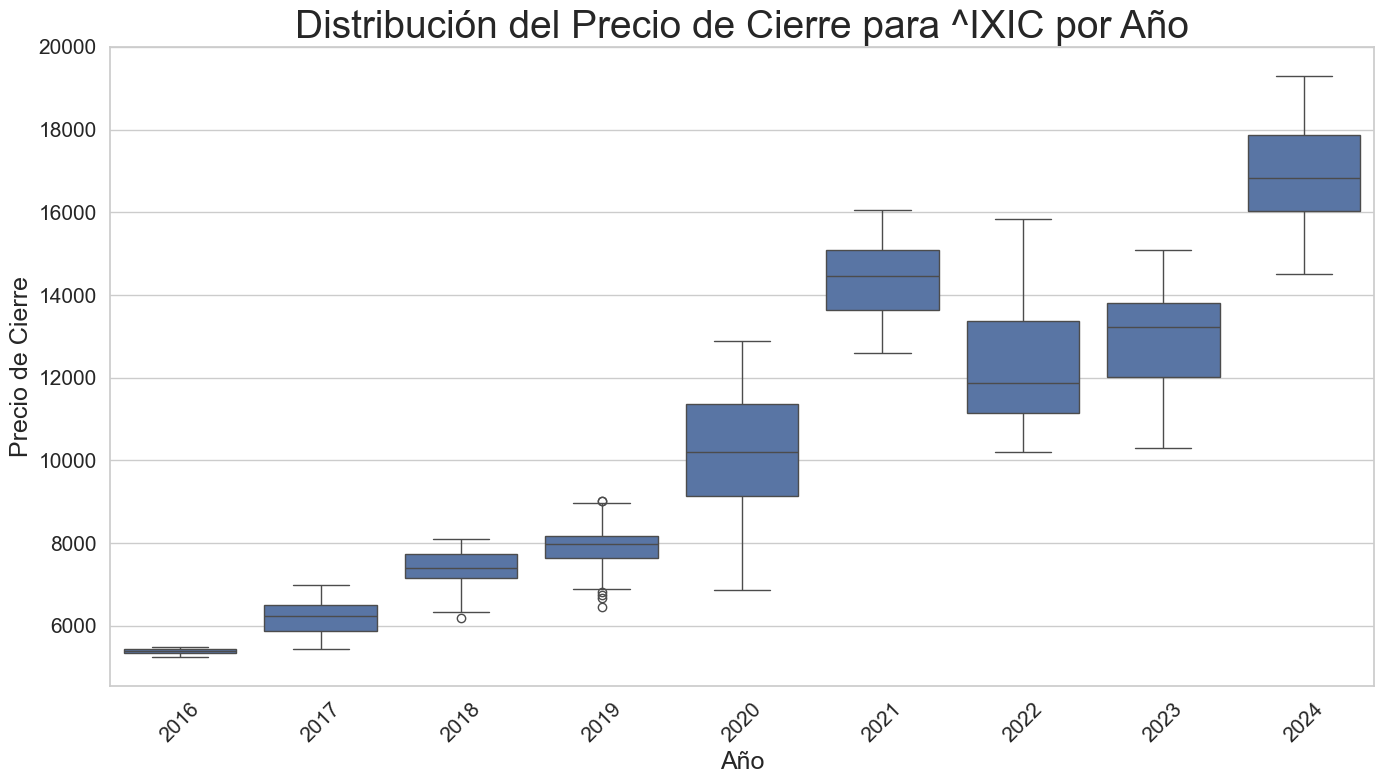

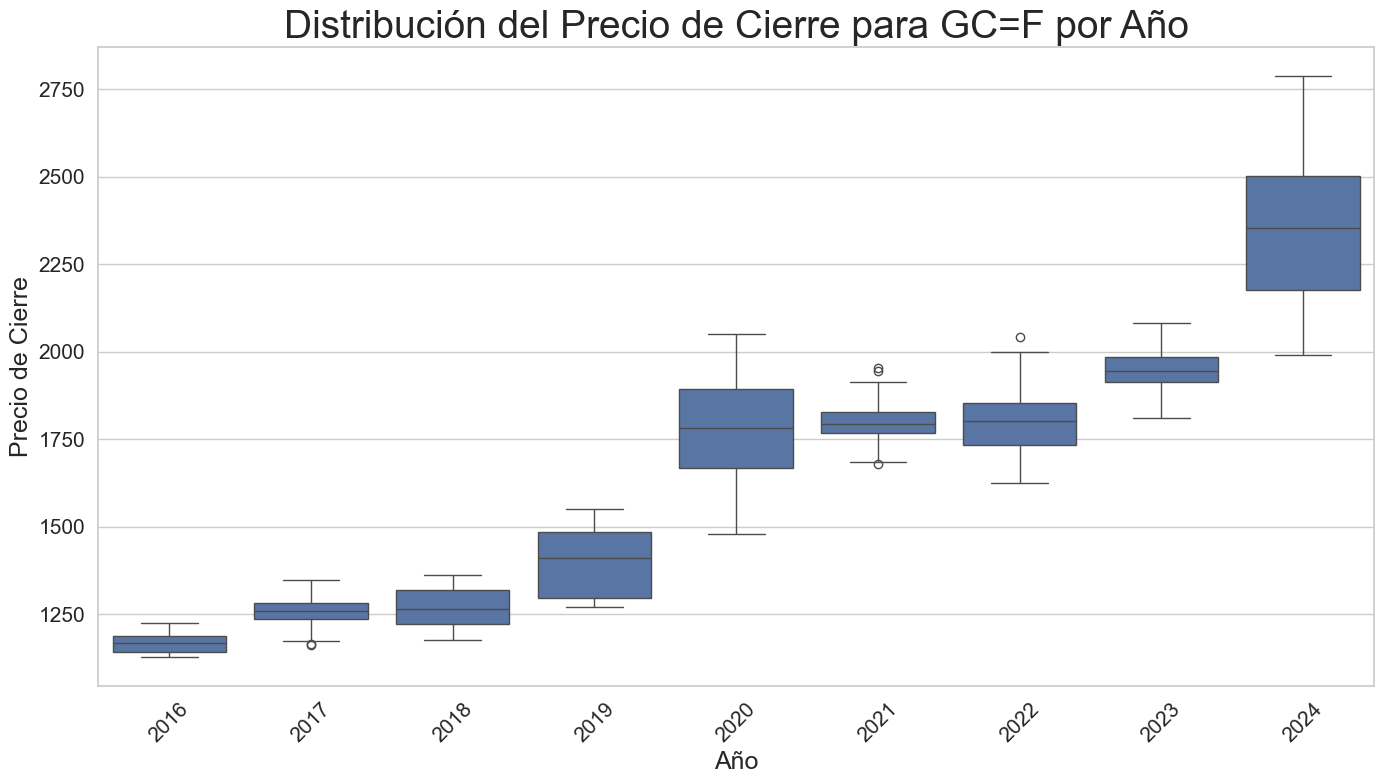

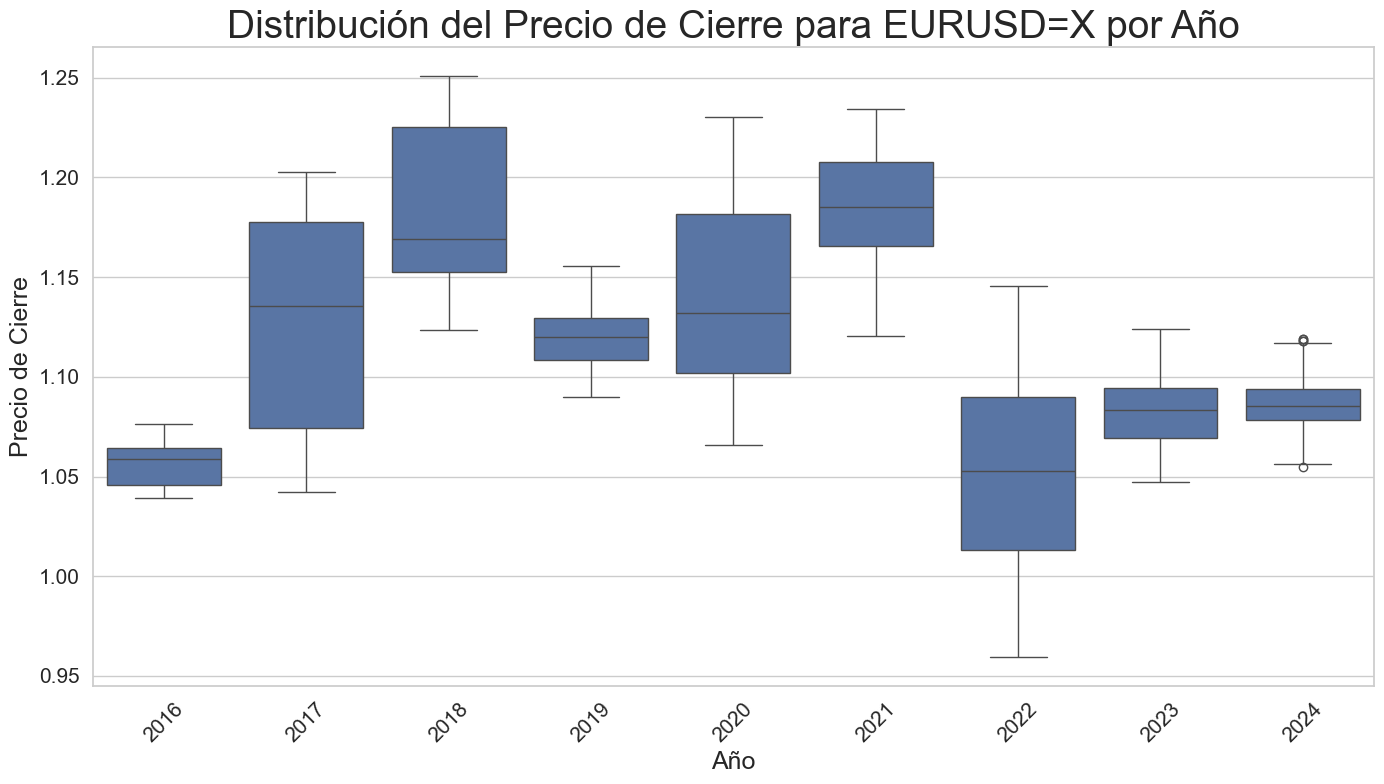

In [112]:
# Filtrar los datos para los últimos 10 años
ten_years_ago = pd.Timestamp.today() - pd.DateOffset(years=8)
df_hist_last_10_years = df_hist[df_hist.index >= ten_years_ago]

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Obtener los símbolos únicos
symbols = df_hist_last_10_years['Symbol'].unique()

# Definir constantes para aumentar el tamaño
title_size_factor = 2   # Factor para el tamaño del título
axis_label_size_factor = 1.5  # Factor para el tamaño de las etiquetas de los ejes
tick_label_size_factor = 1.5  # Factor para el tamaño de las etiquetas de los ticks

# Crear un gráfico independiente para cada símbolo
for symbol in symbols:
    plt.figure(figsize=(14, 8))
    symbol_data = df_hist_last_10_years[df_hist_last_10_years['Symbol'] == symbol]
    
    # Crear un boxplot para el precio de cierre por año
    sns.boxplot(data=symbol_data, x='Year', y='Close')
    
    # Establecer el tamaño de los títulos y etiquetas dinámicamente
    plt.title(f"Distribución del Precio de Cierre para {symbol} por Año", fontsize=14 * title_size_factor)
    plt.xlabel("Año", fontsize=12 * axis_label_size_factor)
    plt.ylabel("Precio de Cierre", fontsize=12 * axis_label_size_factor)
    
    # Aumentar el tamaño de las etiquetas de los ticks
    plt.xticks(rotation=45, fontsize=10 * tick_label_size_factor)
    plt.yticks(fontsize=10 * tick_label_size_factor)
    
    # Ajustar la disposición y mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [113]:
# Filtrar valores nulos (primer valor de cada símbolo tendrá NaN en retorno)
df_hist = df_hist.dropna(subset=['Retorno_Porcentual'])

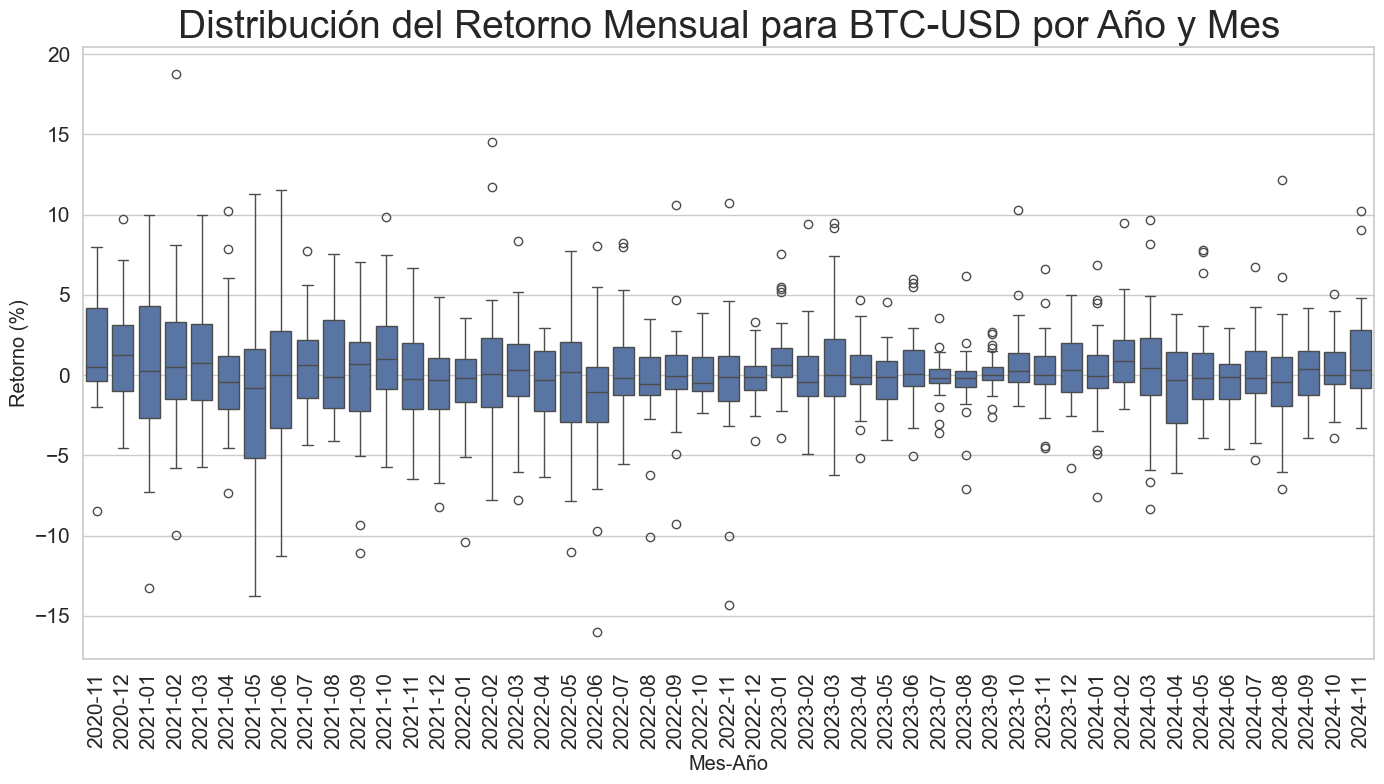

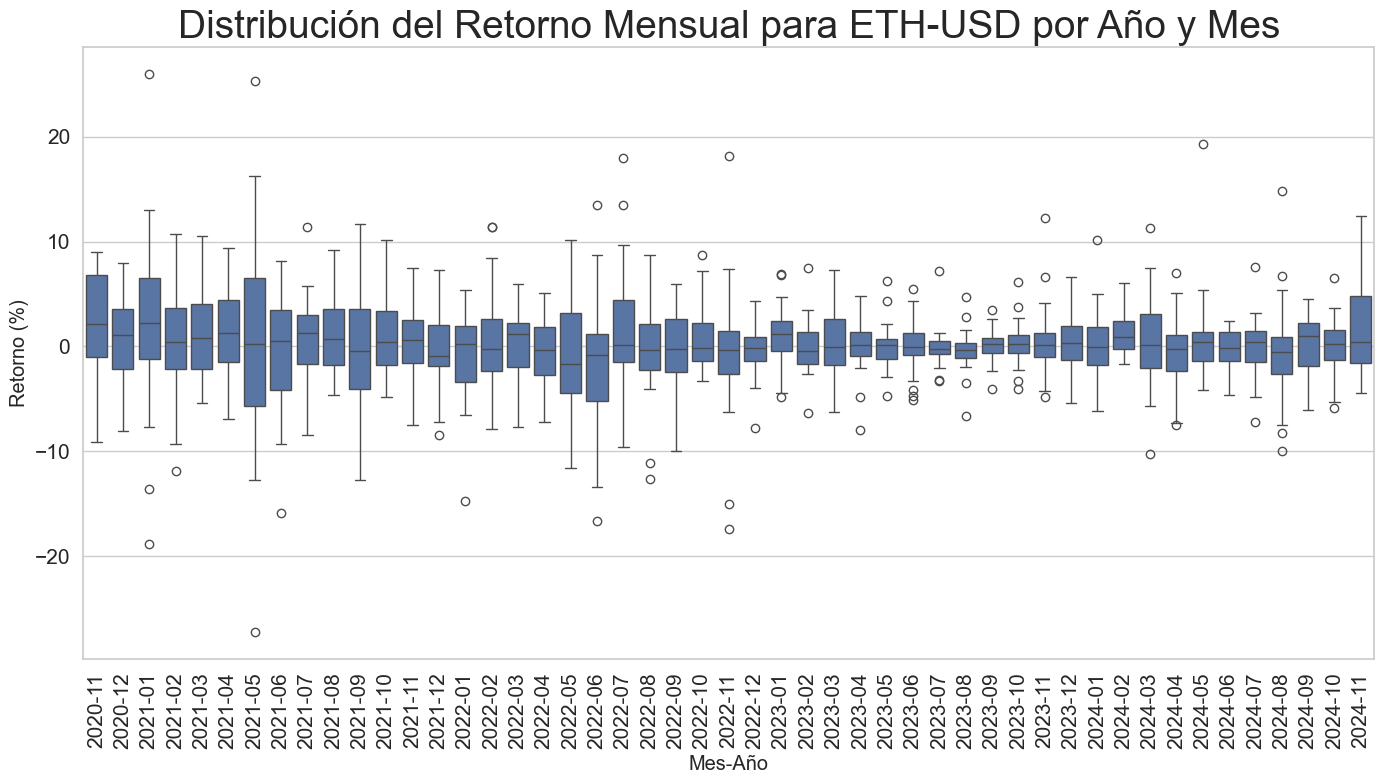

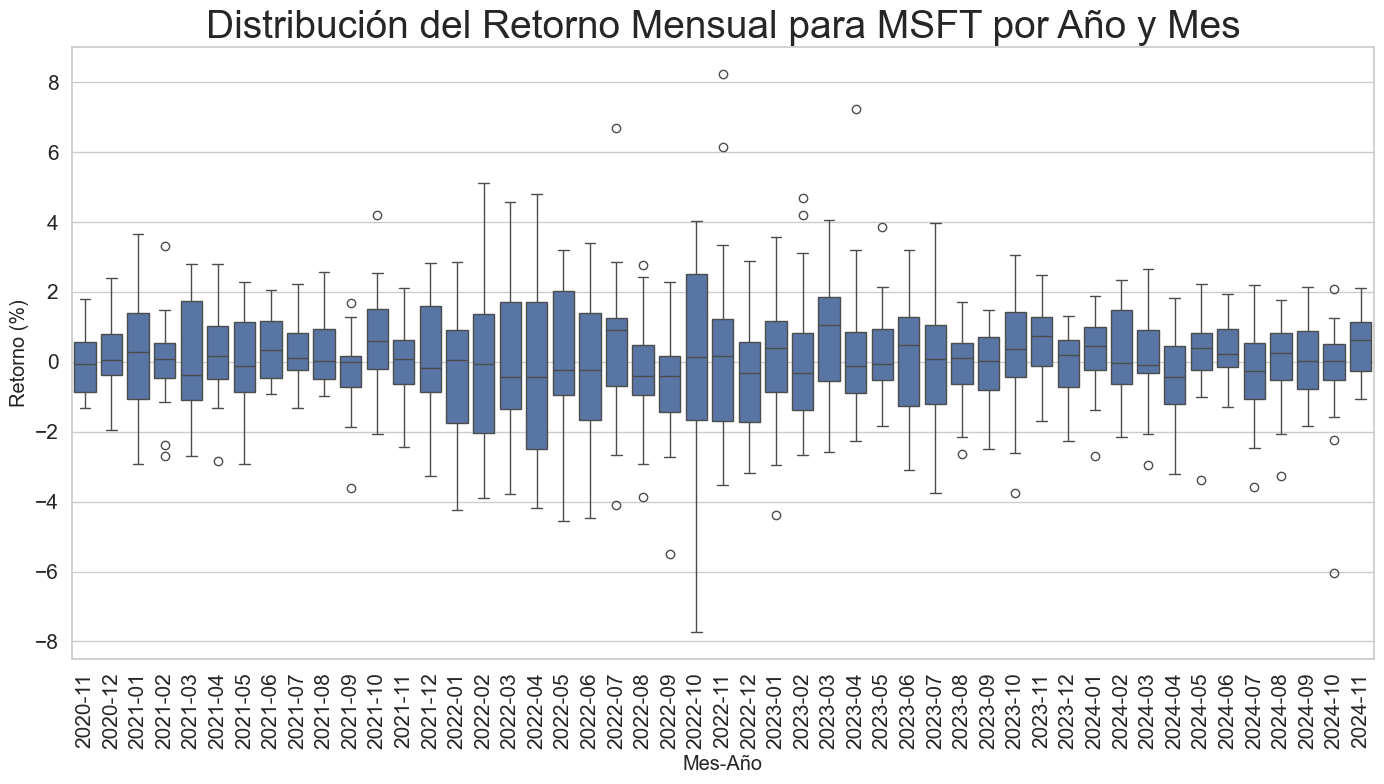

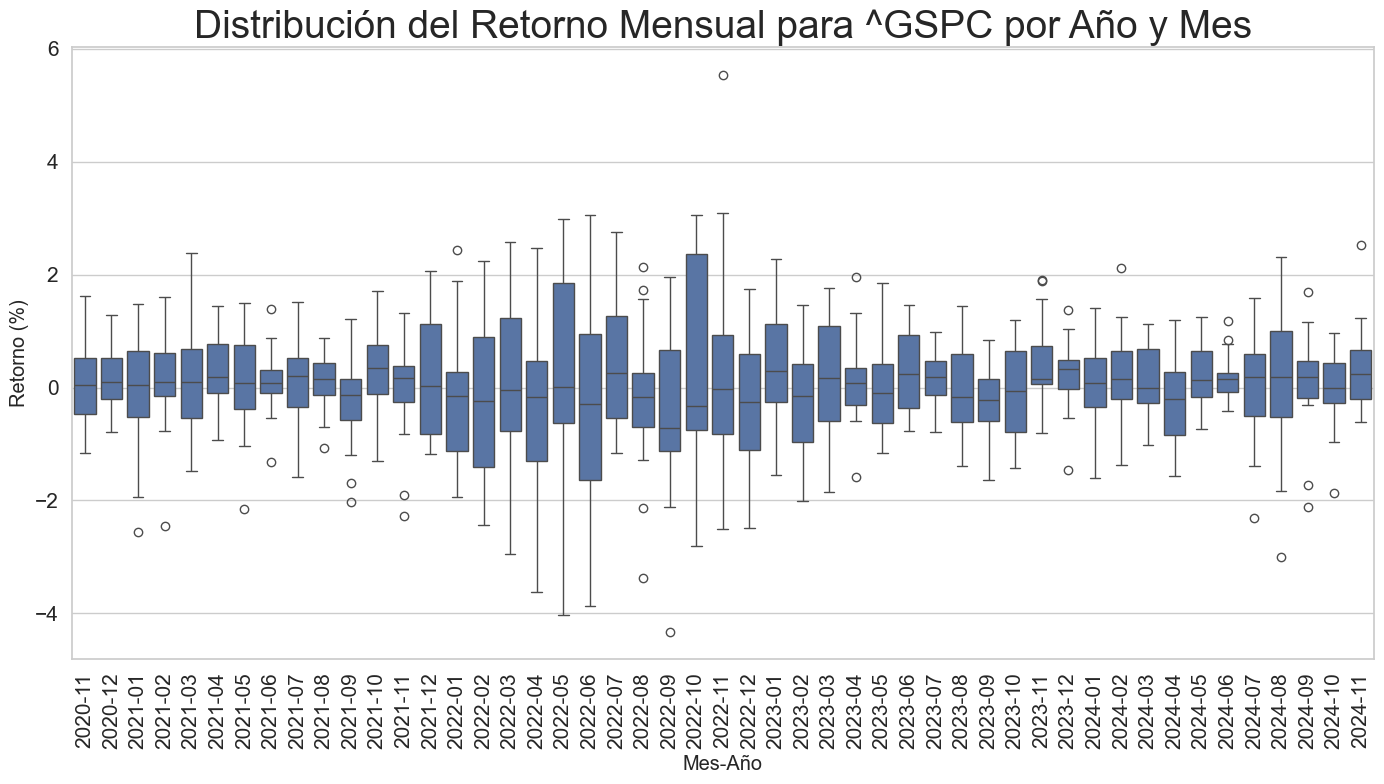

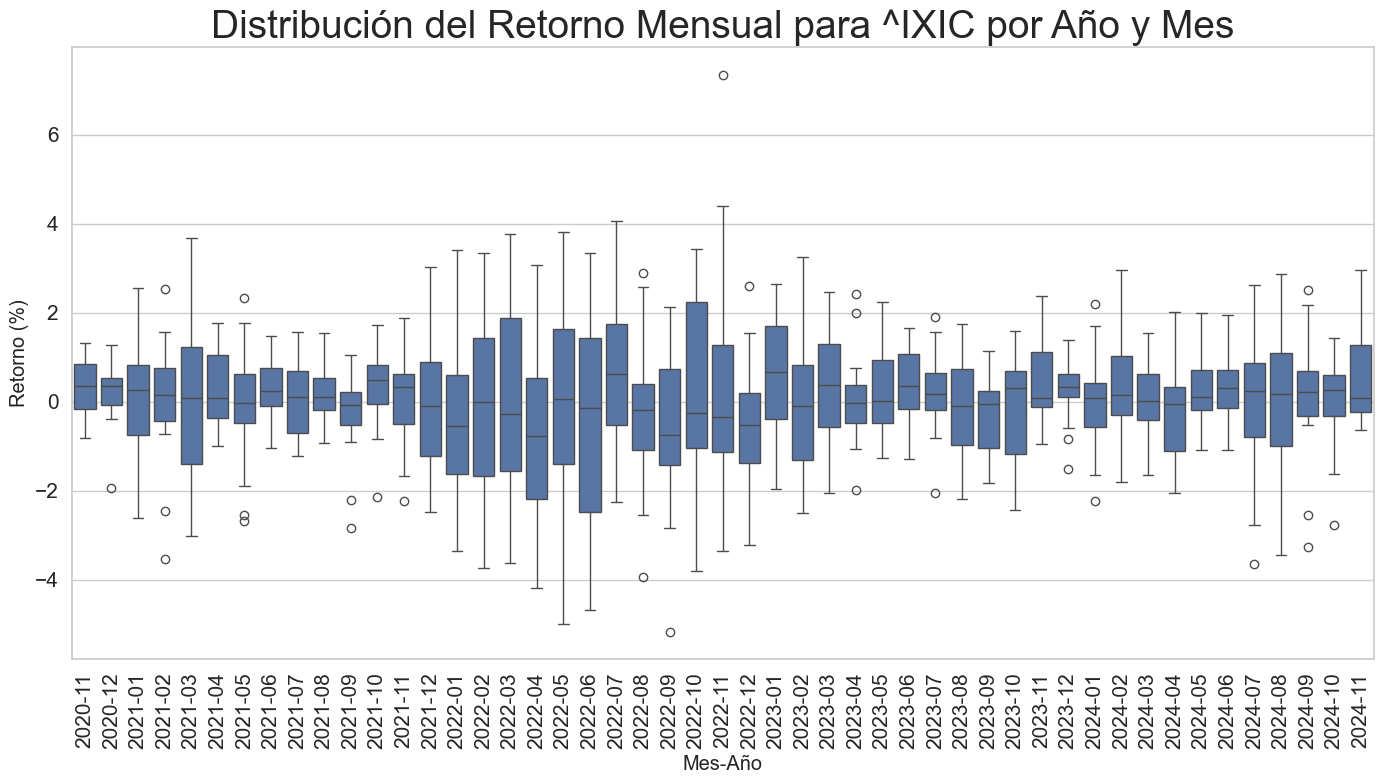

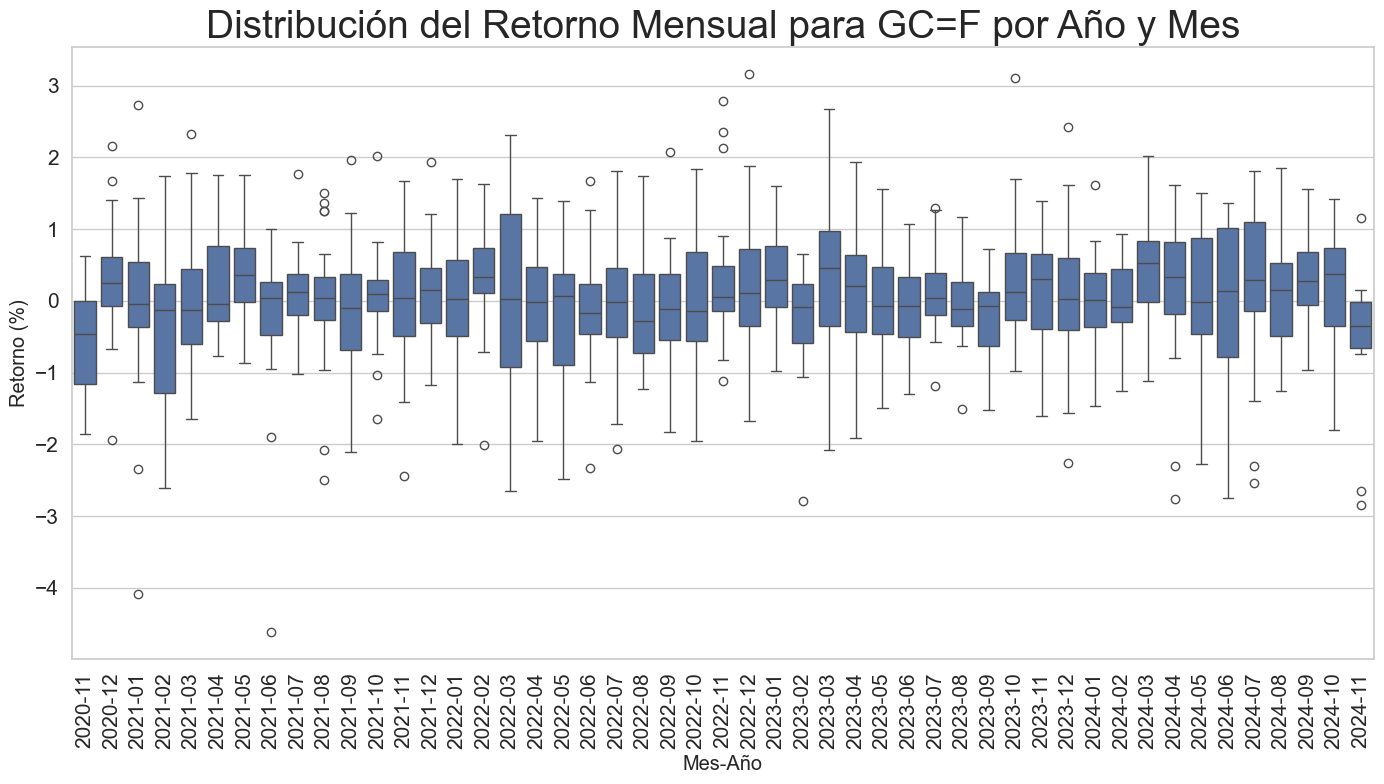

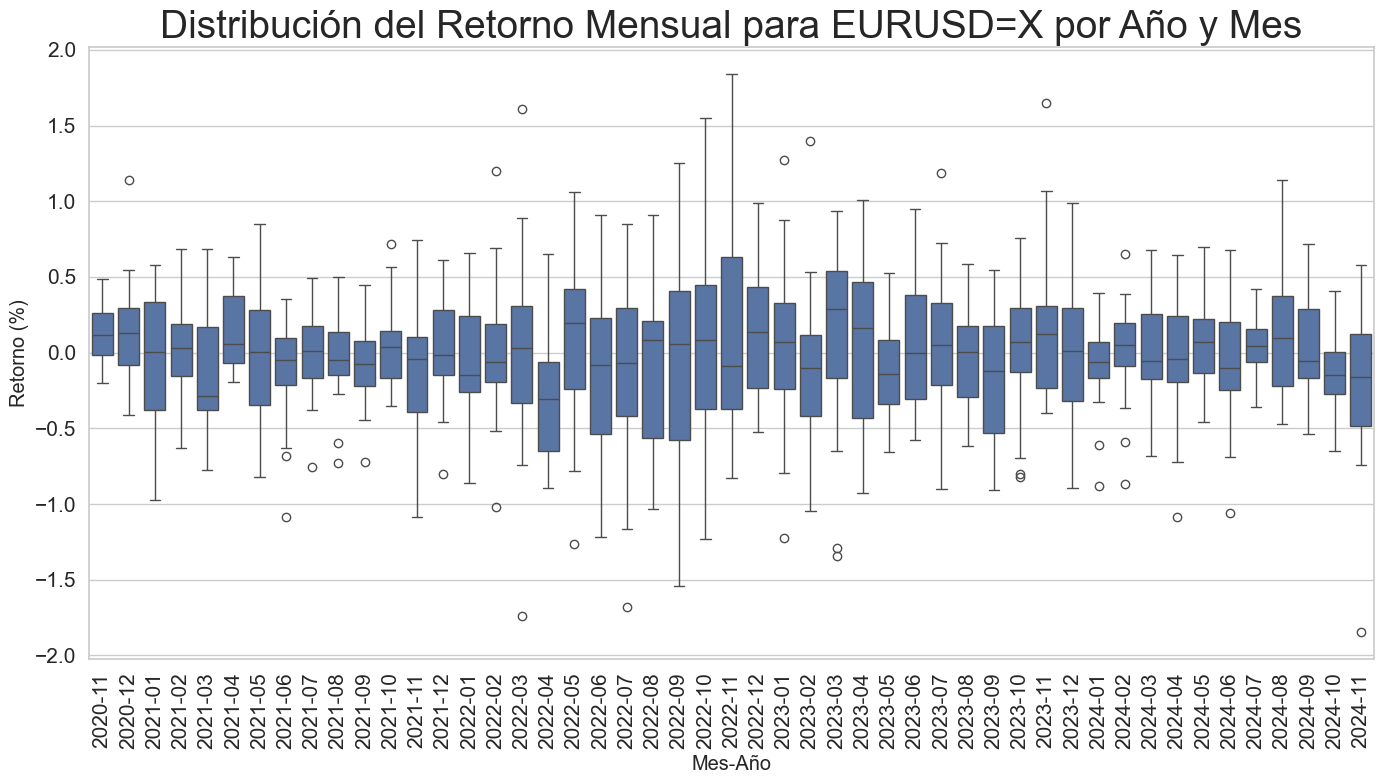

In [117]:
# Filtrar los datos para los últimos 10 años
ten_years_ago = pd.Timestamp.today() - pd.DateOffset(years=4)
df_hist_last_10_years = df_hist[df_hist.index >= ten_years_ago]

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Obtener los símbolos únicos
symbols = df_hist_last_10_years['Symbol'].unique()

# Definir constantes para aumentar el tamaño
title_size_factor = 2   # Factor para el tamaño del título
axis_label_size_factor = 1.2  # Factor para el tamaño de las etiquetas de los ejes
tick_label_size_factor = 1.5  # Factor para el tamaño de las etiquetas de los ticks

# Crear un gráfico independiente para cada símbolo
for symbol in symbols:
    plt.figure(figsize=(14, 8))
    symbol_data = df_hist_last_10_years[df_hist_last_10_years['Symbol'] == symbol]
    
    # Eliminar valores nulos que aparecen debido al cálculo de los retornos
    symbol_data = symbol_data.dropna(subset=['Retorno_Porcentual'])
    
    # Crear un boxplot para los retornos por año y mes
    sns.boxplot(data=symbol_data, x='YearMonth', y='Retorno_Porcentual')
    
    # Establecer el tamaño de los títulos y etiquetas dinámicamente
    plt.title(f"Distribución del Retorno Mensual para {symbol} por Año y Mes", fontsize=14 * title_size_factor)
    plt.xlabel("Mes-Año", fontsize=12 * axis_label_size_factor)
    plt.ylabel("Retorno (%)", fontsize=12 * axis_label_size_factor)
    
    # Aumentar el tamaño de las etiquetas de los ticks
    plt.xticks(rotation=90, fontsize=10 * tick_label_size_factor)
    plt.yticks(fontsize=10 * tick_label_size_factor)
    
    # Ajustar la disposición y mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [85]:
type(bitcoin.history_metadata)

dict

In [86]:
bitcoin.history_metadata.keys()

dict_keys(['currency', 'symbol', 'exchangeName', 'fullExchangeName', 'instrumentType', 'firstTradeDate', 'regularMarketTime', 'hasPrePostMarketData', 'gmtoffset', 'timezone', 'exchangeTimezoneName', 'regularMarketPrice', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow', 'regularMarketDayHigh', 'regularMarketDayLow', 'regularMarketVolume', 'longName', 'shortName', 'chartPreviousClose', 'priceHint', 'currentTradingPeriod', 'dataGranularity', 'range', 'validRanges'])

In [101]:
# Definir los símbolos de los activos
symbols = ["MSFT", "BTC-USD", "ETH-USD", "^GSPC", "^IXIC", "GC=F", "EURUSD=X"]

# Claves importantes para el análisis técnico y fundamental
keys_to_select = [
    "currency", "symbol", "exchangeName", "instrumentType", "regularMarketPrice",
    "fiftyTwoWeekHigh", "fiftyTwoWeekLow", "regularMarketDayHigh", "regularMarketDayLow",
    "regularMarketVolume", "longName", "shortName", "chartPreviousClose", "priceHint",
    "validRanges"
]

# Lista para almacenar los datos de cada ticker
all_data = []

# Iterar sobre cada símbolo en la lista
for symbol in symbols:
    # Obtener el ticker
    ticker = yf.Ticker(symbol)
    
    # Obtener los metadatos históricos
    history_metadata = ticker.history_metadata
    
    # Filtrar los datos relevantes
    filtered_data = {key: history_metadata.get(key) for key in keys_to_select}
    
    # Añadir el símbolo del ticker
    filtered_data['symbol'] = symbol
    
    # Agregar los datos filtrados a la lista
    all_data.append(filtered_data)

# Convertir la lista de diccionarios en un DataFrame
df_history_metadata = pd.DataFrame(all_data)
df_history_metadata[[
    "symbol", "instrumentType", "fiftyTwoWeekHigh", 
    "fiftyTwoWeekLow", "regularMarketDayHigh", "regularMarketDayLow", "longName"]]

,symbol,instrumentType,fiftyTwoWeekHigh,fiftyTwoWeekLow,regularMarketDayHigh,regularMarketDayLow,longName
0,MSFT,EQUITY,468.3500,362.9000,428.1600,420.0000,Microsoft Corporation
1,BTC-USD,CRYPTOCURRENCY,93434.3500,35670.9730,88451.5400,87305.7100,Bitcoin USD
2,ETH-USD,CRYPTOCURRENCY,4092.2840,1910.4450,3091.5090,3038.3690,Ethereum USD
3,^GSPC,INDEX,6017.3100,4499.6600,5993.8800,5942.2800,S&P 500
4,^IXIC,INDEX,19366.0700,14058.5200,19275.8050,19073.3930,NASDAQ Composite
5,GC=F,FUTURE,2789.0000,1969.7000,2576.5000,2567.6000,None
6,EURUSD=X,CURRENCY,1.1212,1.0499,1.0549,1.0526,EUR/USD


In [52]:
msft = yf.Ticker("MSFT")
# show actions (dividends, splits, capital gains)
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21 00:00:00-04:00,0.00,2.0
1990-04-16 00:00:00-04:00,0.00,2.0
1991-06-27 00:00:00-04:00,0.00,1.5
1992-06-15 00:00:00-04:00,0.00,1.5
1994-05-23 00:00:00-04:00,0.00,2.0
...,...,...
2023-08-16 00:00:00-04:00,0.68,0.0
2023-11-15 00:00:00-05:00,0.75,0.0
2024-02-14 00:00:00-05:00,0.75,0.0


In [54]:
msft.dividends


Date
2003-02-19 00:00:00-05:00    0.08
2003-10-15 00:00:00-04:00    0.16
2004-08-23 00:00:00-04:00    0.08
2004-11-15 00:00:00-05:00    3.08
2005-02-15 00:00:00-05:00    0.08
                             ... 
2023-08-16 00:00:00-04:00    0.68
2023-11-15 00:00:00-05:00    0.75
2024-02-14 00:00:00-05:00    0.75
2024-05-15 00:00:00-04:00    0.75
2024-08-15 00:00:00-04:00    0.75
Name: Dividends, Length: 83, dtype: float64

In [55]:
msft.splits

Date
1987-09-21 00:00:00-04:00    2.0
1990-04-16 00:00:00-04:00    2.0
1991-06-27 00:00:00-04:00    1.5
1992-06-15 00:00:00-04:00    1.5
1994-05-23 00:00:00-04:00    2.0
1996-12-09 00:00:00-05:00    2.0
1998-02-23 00:00:00-05:00    2.0
1999-03-29 00:00:00-05:00    2.0
2003-02-18 00:00:00-05:00    2.0
Name: Stock Splits, dtype: float64

In [56]:
msft.capital_gains  # only for mutual funds & etfs

Series([], dtype: object)

In [58]:
msft.calendar

{'Dividend Date': datetime.date(2024, 12, 11),
 'Ex-Dividend Date': datetime.date(2024, 11, 20),
 'Earnings Date': [datetime.date(2025, 1, 28), datetime.date(2025, 2, 3)],
 'Earnings High': 3.47,
 'Earnings Low': 3.08,
 'Earnings Average': 3.16286,
 'Revenue High': 70520000000,
 'Revenue Low': 68488700000,
 'Revenue Average': 68937174200}

In [70]:
msft.news

[{'uuid': 'f8eb5424-667c-3a09-ad90-ee71ef6c8849',
  'title': 'Bill Gates Adjusts Portfolio, Major Reduction in Microsoft Corp Shares',
  'publisher': 'GuruFocus.com',
  'link': 'https://finance.yahoo.com/news/bill-gates-adjusts-portfolio-major-020829742.html',
  'providerPublishTime': 1731636509,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/8ptKi_i5HKYYHDUqhDbewA--~B/aD05MDI7dz0xMjQyO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/us.finance.gurufocus/7d6b563ecc889fd1571dbc962f9f226c',
     'width': 1242,
     'height': 902,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/XKnOfgDV6XAvnRqnxyGIQg--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/us.finance.gurufocus/7d6b563ecc889fd1571dbc962f9f226c',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['MSFT']},
 {'uuid': 'a26c8050-6b9b-349f-8bf1-0af869504760',
  'title': 'Jeff Auxier Adjusts Port

In [72]:
# Definir los símbolos de los activos
symbols = ["MSFT"]

# Crear una lista para almacenar los DataFrames
all_data = []

# Iterar a través de cada símbolo
for symbol in symbols:
    # Definir el activo
    ticker = yf.Ticker(symbol)
    
    # Crear un diccionario para almacenar los datos
    data_dict = {}
    
    # 1. Mostrar cantidad de acciones en un rango específico
    data_dict['share_count'] = ticker.get_shares_full(start="2022-01-01")

    # 2. Información financiera:
    data_dict['calendar'] = ticker.calendar
    data_dict['sec_filings'] = ticker.sec_filings

    # Estados financieros:
    data_dict['income_statement'] = ticker.income_stmt
    data_dict['quarterly_income_statement'] = ticker.quarterly_income_stmt
    data_dict['balance_sheet'] = ticker.balance_sheet
    data_dict['quarterly_balance_sheet'] = ticker.quarterly_balance_sheet
    data_dict['cash_flow'] = ticker.cashflow
    data_dict['quarterly_cashflow'] = ticker.quarterly_cashflow

    # 3. Holders:
    data_dict['major_holders'] = ticker.major_holders
    data_dict['institutional_holders'] = ticker.institutional_holders
    data_dict['mutual_fund_holders'] = ticker.mutualfund_holders
    data_dict['insider_transactions'] = ticker.insider_transactions
    data_dict['insider_purchases'] = ticker.insider_purchases

    # 4. Sostenibilidad:
    data_dict['sustainability'] = ticker.sustainability

    # 5. Recomendaciones:
    data_dict['recommendations'] = ticker.recommendations
    data_dict['recommendations_summary'] = ticker.recommendations_summary
    data_dict['upgrades_downgrades'] = ticker.upgrades_downgrades

    # 6. Datos de analistas:
    data_dict['analyst_price_targets'] = ticker.analyst_price_targets
    data_dict['earnings_estimate'] = ticker.earnings_estimate
    data_dict['revenue_estimate'] = ticker.revenue_estimate
    data_dict['earnings_history'] = ticker.earnings_history
    data_dict['eps_trend'] = ticker.eps_trend
    data_dict['eps_revisions'] = ticker.eps_revisions
    #data_dict['growth_estimates'] = ticker.growth_estimates

    # 7. Fechas de ingresos (ganancias):
    data_dict['earnings_dates'] = ticker.earnings_dates

    # 8. Expiración de opciones:
    data_dict['options'] = ticker.options

    # 9. Noticias:
    data_dict['news'] = ticker.news

    # 10. Cadena de opciones para una fecha específica (reemplazar 'YYYY-MM-DD' con una fecha de vencimiento disponible)
    if ticker.options:
        expiration_date = ticker.options[0]  # Ejemplo: seleccionar la primera fecha de expiración
        option_chain = ticker.option_chain(expiration_date)
        data_dict['option_chain_calls'] = option_chain.calls
        data_dict['option_chain_puts'] = option_chain.puts

In [79]:
# Definir los símbolos de los activos
symbols = ["MSFT"]# "BTC-USD", "^GSPC", "^IXIC", "GC=F", "EURUSD=X"]

# Crear una lista para almacenar los DataFrames
all_data = []

# Iterar a través de cada símbolo
for symbol in symbols:
    ticker = yf.Ticker(symbol)
    data_dict = {}
    
    try:
        # Información financiera básica
        data_dict['calendar'] = ticker.calendar
        data_dict['quarterly_income_statement'] = ticker.quarterly_income_stmt
        data_dict['quarterly_balance_sheet'] = ticker.quarterly_balance_sheet
        data_dict['quarterly_cashflow'] = ticker.quarterly_cashflow

        # Holders
        data_dict['major_holders'] = ticker.major_holders
        data_dict['institutional_holders'] = ticker.institutional_holders
        data_dict['insider_transactions'] = ticker.insider_transactions

        # Recomendaciones y datos de analistas
        data_dict['recommendations_summary'] = ticker.recommendations_summary
        data_dict['analyst_price_targets'] = ticker.analyst_price_targets
        data_dict['earnings_estimate'] = ticker.earnings_estimate
        data_dict['eps_trend'] = ticker.eps_trend

        # Sostenibilidad
        data_dict['sustainability'] = ticker.sustainability

        # Noticias
        data_dict['news'] = ticker.news

        # Agregar el símbolo como una columna y guardar en un DataFrame
        for key, value in data_dict.items():
            if isinstance(value, pd.DataFrame):
                value['symbol'] = symbol
                value['data_type'] = key
                all_data.append(value)
                
    except Exception as e:
        print(f"Error al obtener datos para {symbol}: {e}")

In [80]:
for key in data_dict.keys():
    print(key)
    print(data_dict[key])
    print("\n")

calendar
{'Dividend Date': datetime.date(2024, 12, 11), 'Ex-Dividend Date': datetime.date(2024, 11, 20), 'Earnings Date': [datetime.date(2025, 1, 28), datetime.date(2025, 2, 3)], 'Earnings High': 3.47, 'Earnings Low': 3.08, 'Earnings Average': 3.16286, 'Revenue High': 70520000000, 'Revenue Low': 68488700000, 'Revenue Average': 68937174200}


quarterly_income_statement
                                                   2024-09-30 00:00:00  \
Tax Effect Of Unusual Items                                 57190000.0   
Tax Rate For Calcs                                                0.19   
Normalized EBITDA                                        37933000000.0   
Total Unusual Items                                        301000000.0   
Total Unusual Items Excluding Goodwill                     301000000.0   
Net Income From Continuing Operation Net Minori...       24667000000.0   
Reconciled Depreciation                                   7383000000.0   
Reconciled Cost Of Revenue           